# Airline Passenger Satisfaction

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
warnings.filterwarnings("ignore")

# Reading Dataset

In [2]:
df=pd.read_csv("test.csv")

# First Glance of the Dataset

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
df.drop("Unnamed: 0", inplace=True, axis=1)                       #Droping column

In [5]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


# Describing Dataset

In [6]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [7]:
df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

# Dropping Null Values

In [8]:
df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [9]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25893 non-null  int64  
 1   Gender                             25893 non-null  object 
 2   Customer Type                      25893 non-null  object 
 3   Age                                25893 non-null  int64  
 4   Type of Travel                     25893 non-null  object 
 5   Class                              25893 non-null  object 
 6   Flight Distance                    25893 non-null  int64  
 7   Inflight wifi service              25893 non-null  int64  
 8   Departure/Arrival time convenient  25893 non-null  int64  
 9   Ease of Online booking             25893 non-null  int64  
 10  Gate location                      25893 non-null  int64  
 11  Food and drink                     25893 non-null  int

In [11]:
df1=df.drop("id", axis=1)

# Removing Outliers Using IQR Method

In [12]:
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3 - q1

In [13]:
iqr

Age                                    24.0
Flight Distance                      1330.0
Inflight wifi service                   2.0
Departure/Arrival time convenient       2.0
Ease of Online booking                  2.0
Gate location                           2.0
Food and drink                          2.0
Online boarding                         2.0
Seat comfort                            3.0
Inflight entertainment                  2.0
On-board service                        2.0
Leg room service                        2.0
Baggage handling                        2.0
Checkin service                         1.0
Inflight service                        2.0
Cleanliness                             2.0
Departure Delay in Minutes             12.0
Arrival Delay in Minutes               13.0
dtype: float64

In [14]:
df1.shape

(25893, 23)

In [15]:
cleaniqr=df1[~((df1<(q1-1.5*iqr))|(df1>(q3+1.5*iqr))).any(axis=1)]

In [16]:
cleaniqr.shape

(18662, 23)

In [17]:
cleaniqr.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
8,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,2,...,5,2,2,5,3,3,5,1,0.0,satisfied


In [18]:
cleaniqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18662 entries, 1 to 25974
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             18662 non-null  object 
 1   Customer Type                      18662 non-null  object 
 2   Age                                18662 non-null  int64  
 3   Type of Travel                     18662 non-null  object 
 4   Class                              18662 non-null  object 
 5   Flight Distance                    18662 non-null  int64  
 6   Inflight wifi service              18662 non-null  int64  
 7   Departure/Arrival time convenient  18662 non-null  int64  
 8   Ease of Online booking             18662 non-null  int64  
 9   Gate location                      18662 non-null  int64  
 10  Food and drink                     18662 non-null  int64  
 11  Online boarding                    18662 non-null  int

In [19]:
cleaniqr.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000
mean,39.663702,1151.939396,2.748473,3.078770,2.753831,2.946897,3.246651,3.329386,3.507127,3.399689,3.475351,3.395188,3.710642,3.650252,3.742311,3.337584,3.414211,3.450488
std,15.173267,928.776196,1.354392,1.543125,1.419492,1.290636,1.324433,1.364541,1.318042,1.342238,1.266616,1.309393,1.167763,0.983171,1.166944,1.310595,6.665535,6.694357
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000
25%,27.000000,409.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,846.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1719.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,3.000000,4.000000
max,85.000000,3739.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,32.000000


## Univariate Analysis

### Satisfaction Variable

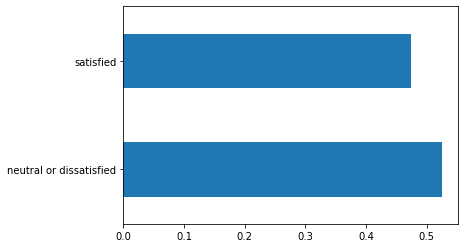

In [20]:
cleaniqr.satisfaction.value_counts(normalize=True).plot.barh()
plt.show()

### Gender Variable

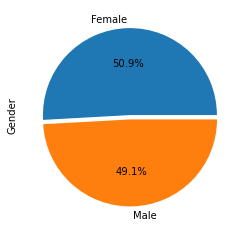

In [21]:
cleaniqr.Gender.value_counts(normalize=True).plot.pie(explode=(0,0.05), autopct='%1.1f%%')
plt.show()

## Age Variable

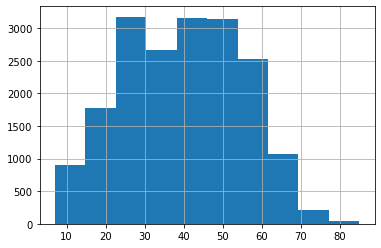

In [22]:
cleaniqr["Age"].hist()
plt.show()

## Statistical Analysis

In [23]:
cleaniqr["Flight Distance"].median()

846.0

In [24]:
cleaniqr["Flight Distance"].mean()

1151.9393955631765

In [25]:
cleaniqr["Age"].median()

40.0

## Bivariate Analysis

In [26]:
cleaniqr.groupby("satisfaction")["Flight Distance"].median()

satisfaction
neutral or dissatisfied     669.0
satisfied                  1197.0
Name: Flight Distance, dtype: float64

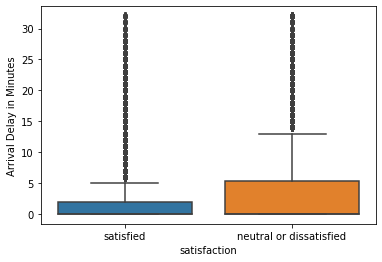

In [27]:
sns.boxplot(data=cleaniqr, x="satisfaction", y="Arrival Delay in Minutes")
plt.show()

<AxesSubplot:ylabel='satisfaction'>

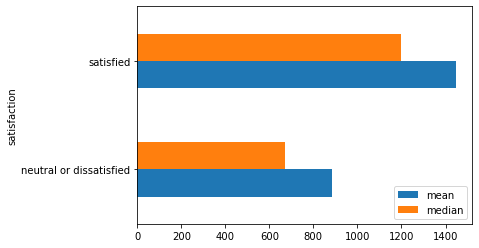

In [28]:
cleaniqr.groupby("satisfaction")["Flight Distance"].aggregate(["mean", "median"]).plot.barh()

In [29]:
def p75(x):
    return np.quantile(x,0.75)

<AxesSubplot:ylabel='satisfaction'>

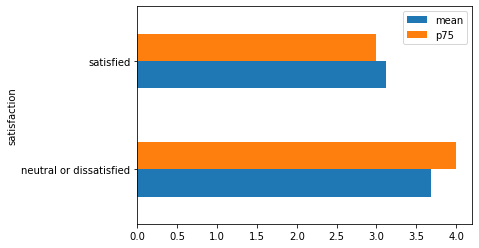

In [30]:
cleaniqr.groupby("satisfaction")["Departure Delay in Minutes"].aggregate(["mean",p75]).plot.barh()

In [31]:
cleaniqr["satisfaction_flag"]=np.where(cleaniqr.satisfaction=="satisfied",1,0)

In [32]:
cleaniqr.satisfaction_flag.value_counts()

0    9812
1    8850
Name: satisfaction_flag, dtype: int64

In [33]:
cleaniqr.satisfaction_flag.value_counts(normalize=True)

0    0.525774
1    0.474226
Name: satisfaction_flag, dtype: float64

In [34]:
cleaniqr.groupby(["Class"])["satisfaction_flag"].mean()

Class
Business    0.739963
Eco         0.205817
Eco Plus    0.261668
Name: satisfaction_flag, dtype: float64

<AxesSubplot:xlabel='Class'>

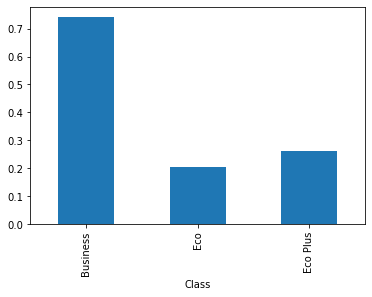

In [35]:
cleaniqr.groupby(["Class"])["satisfaction_flag"].mean().plot.bar()

<AxesSubplot:xlabel='Type of Travel'>

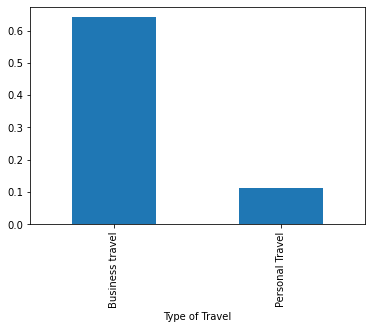

In [36]:
cleaniqr.groupby(["Type of Travel"])["satisfaction_flag"].mean().plot.bar()

<AxesSubplot:xlabel='Type of Travel'>

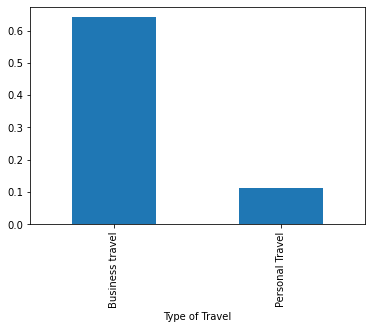

In [37]:
cleaniqr.groupby(["Type of Travel"])["satisfaction_flag"].mean().plot.bar()

## Multivariate Analysis

In [38]:
cleaniqr[["Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"]].corr()

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Flight Distance,1.000000,0.009090,-0.006496
Departure Delay in Minutes,0.009090,1.000000,0.594706
Arrival Delay in Minutes,-0.006496,0.594706,1.000000


[]

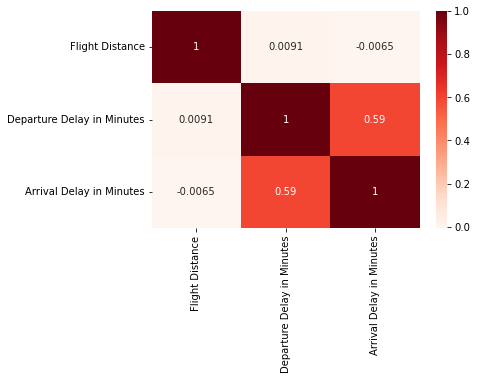

In [39]:
sns.heatmap(cleaniqr[["Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"]].corr(), annot=True, cmap="Reds")
plt.plot()

<AxesSubplot:xlabel='Class', ylabel='Cleanliness'>

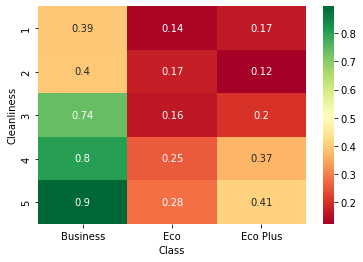

In [40]:
res=pd.pivot_table(data=cleaniqr, index="Cleanliness", columns="Class", values="satisfaction_flag")
sns.heatmap(res, annot=True, cmap="RdYlGn", )

# Hypothesis Testing

In [41]:
from statsmodels.stats import weightstats as stests

In [42]:
import scipy.stats as stats 

In [43]:
cleaniqr['Flight Distance'].describe()

count    18662.000000
mean      1151.939396
std        928.776196
min         31.000000
25%        409.000000
50%        846.000000
75%       1719.500000
max       3739.000000
Name: Flight Distance, dtype: float64

In [50]:
s,p=stats.ttest_1samp(cleaniqr['Flight Distance'], 1140)
s,p

(1.7561045057176081, 0.07908696845060009)

In [51]:
if p<0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Fail to Reject Null Hypothesis
